In [314]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.wcs import WCS
plt.style.use(astropy_mpl_style)

In [315]:
diffim = get_pkg_data_filename('diff_Files-part1/ztf_20200206287824_000819_zg_c13_o_q2_scimrefdiffimg.fits')

In [316]:
with fits.open(diffim) as hdu:

    science_data1 = hdu[1].data
    science_header1 = hdu[1].header

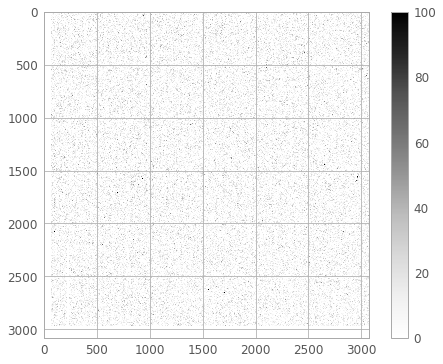

In [317]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.colorbar()

In [318]:
science_data1.shape

(3080, 3072)

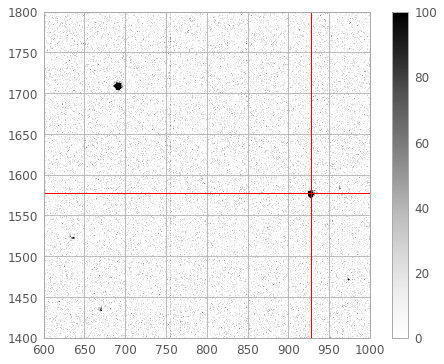

In [319]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.xlim(600,1000)
plt.ylim(1400,1800)
plt.vlines(928, 0, 2000, color='r', lw=1)
plt.hlines(1577, 0, 2000, color='r', lw=1)
plt.colorbar()

In [320]:
w = WCS(science_header1)
tra, tdec = w.wcs_pix2world(928., 1577., 1)
print(tra, tdec)

186.08957740114806 65.31211780184103


In [321]:
ralim, declim = w.wcs_pix2world([0,science_data1.shape[0]], [0,science_data1.shape[1]], 1)
print(ralim, declim)

[186.82591419 184.57051682] [65.72671021 64.94409859]


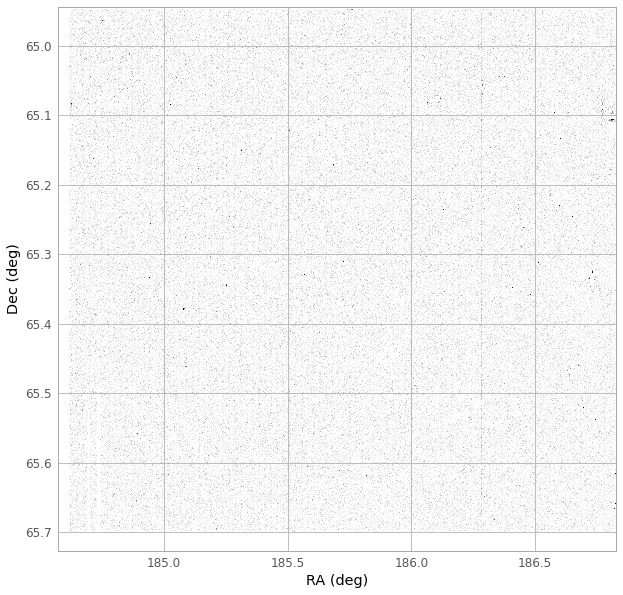

In [322]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(science_data1, interpolation='none', cmap='Greys', 
          extent = [ralim[1], ralim[0], declim[0], declim[1]], clim = (0,100), aspect='auto')

plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)");

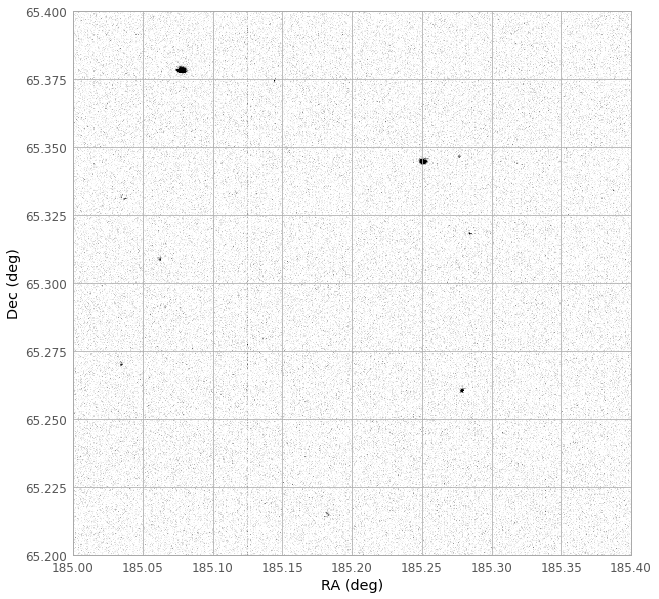

In [323]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(science_data1, interpolation='none', cmap='Greys', 
          extent = [ralim[1], ralim[0], declim[0], declim[1]], clim = (0,100), aspect='auto')

plt.xlim(185.0,185.4)
plt.ylim(65.2,65.4)

plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)");

## SExtractor Catalogs

In [324]:
refdf = pd.read_table('~/ztfsex/ref.cat', names=['NUMBER',
'X_IMAGE',
'Y_IMAGE',
'XWIN_IMAGE',
'YWIN_IMAGE',
'XMODEL_IMAGE',
'YMODEL_IMAGE',
'FLUX_AUTO',
'FLUX_MODEL',
'MAG_AUTO',
'MAG_MODEL',
'FLUX_RADIUS',
'FLAGS',
'NITER_MODEL',
'ALPHA_SKY',
'DELTA_SKY',
'THETA_WORLD'], skiprows=17, delim_whitespace=True)

diffdf = pd.read_table('~/ztfsex/diff.cat', names=['NUMBER',
'X_IMAGE',
'Y_IMAGE',
'XWIN_IMAGE',
'YWIN_IMAGE',
'XMODEL_IMAGE',
'YMODEL_IMAGE',
'FLUX_AUTO',
'FLUX_MODEL',
'MAG_AUTO',
'MAG_MODEL',
'FLUX_RADIUS',
'FLAGS',
'NITER_MODEL',
'ALPHA_SKY',
'DELTA_SKY',
'THETA_WORLD'], skiprows=17, delim_whitespace=True)


In [325]:
refdf

,NUMBER,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD
0,1,106.1428,81.5823,106.1452,81.3903,106.1212,81.4162,9459.741,9587.694,-9.9397,-9.9543,1.546,0,114,186.004494,65.363059,-79.31
1,2,366.5318,475.0735,366.5468,474.8824,366.5516,474.9395,9210.522,9386.072,-9.9107,-9.9312,1.533,0,73,186.151767,65.247332,-71.70
2,3,439.6944,402.0551,439.7159,401.9519,439.7075,401.9770,2849.034,3015.146,-8.6367,-8.6983,1.487,0,59,186.204808,65.265540,-83.62
3,4,490.2754,385.4096,490.3217,385.1494,490.3707,385.4651,201069.200,177137.400,-13.2584,-13.1208,1.570,16,56,186.239311,65.268764,63.42
4,5,269.2091,326.6755,269.2364,326.5275,269.2369,326.5318,4804.375,5038.203,-9.2041,-9.2557,1.516,0,74,186.096959,65.290970,-61.30
5,6,493.4649,289.8722,493.4646,289.7093,493.4717,289.7839,7324.532,8079.649,-9.6620,-9.7685,1.537,16,39,186.247664,65.295086,-74.42
6,7,142.5566,277.9377,142.5443,277.7582,142.5470,277.8408,7463.265,7670.281,-9.6823,-9.7120,1.499,0,37,186.016245,65.307804,-78.39
7,8,213.5133,259.2403,213.5415,259.0061,213.5115,259.1134,39865.780,40065.550,-11.5015,-11.5069,1.560,0,41,186.064400,65.311098,62.72
8,9,251.4941,251.2800,251.4810,251.1410,251.4924,251.1766,3027.074,3423.042,-8.7026,-8.8360,1.532,0,30,186.090049,65.312288,-72.39
9,10,109.7536,221.5978,109.8383,221.6419,109.8643,221.6583,1915.659,1932.917,-8.2058,-8.2155,3.215,0,35,185.998072,65.324246,-40.14


In [326]:
diffdf

,NUMBER,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD
0,1,503.1211,1529.0396,503.3874,1528.2999,503.2475,1528.6663,4.699205e+03,10036.75,-9.1801,-10.0040,1.027,0,91,186.377628,65.313782,-88.18
1,2,927.4387,1576.5729,927.3816,1576.4155,927.3794,1576.4317,1.628588e+04,16488.29,-10.5295,-10.5429,1.990,0,33,186.089982,65.312222,-52.44
2,3,691.5524,1708.4601,691.5854,1708.1253,691.5716,1708.2406,2.595288e+04,25765.61,-11.0355,-11.0276,2.323,0,37,186.239340,65.268843,-79.67
3,4,10.9789,1439.4927,10.9789,1439.4926,0.0000,0.0000,1.115040e+07,0.00,-17.6182,99.0000,4904.597,56,0,186.713762,65.324525,83.89
4,5,72.3022,1314.5347,72.3022,1314.5347,0.0000,0.0000,-1.138748e+05,0.00,99.0000,99.0000,0.000,51,0,186.681574,65.361301,83.69
5,6,72.1534,327.3397,72.1534,327.3397,0.0000,0.0000,0.000000e+00,0.00,99.0000,99.0000,0.000,50,0,186.752896,65.637381,83.89
6,7,67.7209,2372.9482,67.7209,2372.9483,67.7254,2372.9485,-1.889692e+06,102652.30,99.0000,-12.5284,58.620,51,10,186.609800,65.065114,83.81
7,8,3066.4312,2842.2798,3066.2940,2842.3675,3066.2271,2842.4694,7.773965e+03,13576.48,-9.7266,-10.3320,1.132,16,36,184.590684,65.008257,39.86
8,9,2886.7805,2959.8325,2860.7589,2943.0817,2958.0667,2949.3649,1.436353e+07,26716970.00,-17.8932,-18.5670,141.568,19,144,184.704064,64.971562,-1.38
9,10,2231.6165,2960.6719,2109.2412,2974.6742,2231.3947,2958.9824,2.652745e+07,27308610.00,-18.5592,-18.5907,303.428,19,43,185.138249,64.956944,-3.04


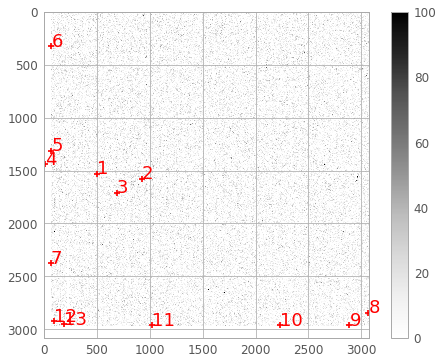

In [327]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.colorbar()

plt.scatter(diffdf["X_IMAGE"]-1, diffdf["Y_IMAGE"]-1, color='r', marker='+')
for i,txt in enumerate(diffdf["NUMBER"].values):
    plt.annotate(txt, (diffdf["X_IMAGE"].values[i], diffdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

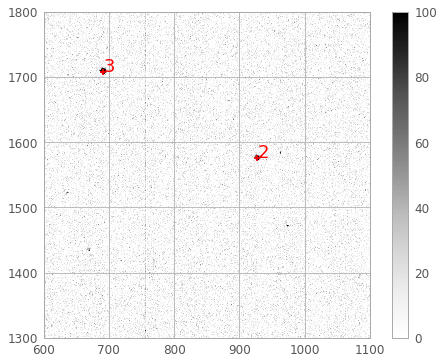

In [328]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.xlim(600,1100)
plt.ylim(1300,1800)
plt.colorbar()

plt.scatter(diffdf["X_IMAGE"]-1, diffdf["Y_IMAGE"]-1, color='r', marker='+')
for i,txt in enumerate(diffdf["NUMBER"].values):
    plt.annotate(txt, (diffdf["X_IMAGE"].values[i], diffdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

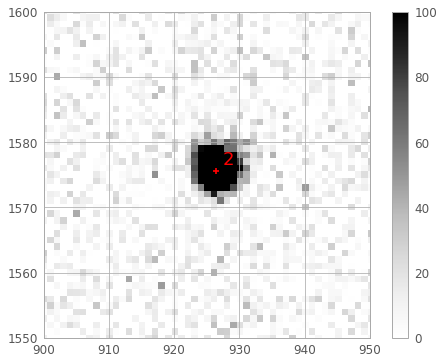

In [329]:
plt.figure()
plt.imshow(science_data1, interpolation='none', cmap='Greys', clim=(0,100))
plt.xlim(900,950)
plt.ylim(1550,1600)
plt.colorbar()

plt.scatter(diffdf["X_IMAGE"]-1, diffdf["Y_IMAGE"]-1, color='r', marker='+')
for i,txt in enumerate(diffdf["NUMBER"].values):
    plt.annotate(txt, (diffdf["X_IMAGE"].values[i], diffdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

In [330]:
with fits.open('diff_Files-part1/ztfref.fits') as hdu:

    ref_data1 = hdu[0].data
    ref_header1 = hdu[0].header

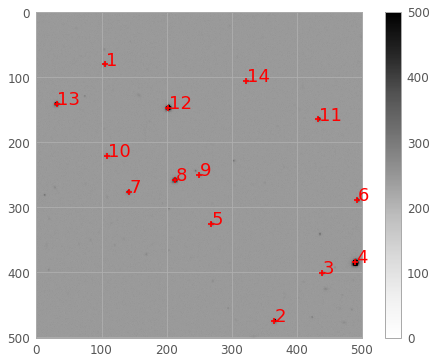

In [331]:
plt.figure()
plt.imshow(ref_data1, interpolation='none', cmap='Greys', clim=(0,500))
plt.colorbar()
plt.scatter(refdf["X_IMAGE"]-1, refdf["Y_IMAGE"]-1, color='r', marker='+')

for i,txt in enumerate(refdf["NUMBER"].values):
    plt.annotate(txt, (refdf["X_IMAGE"].values[i], refdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

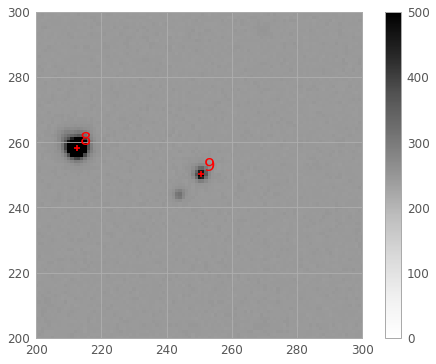

In [332]:
plt.figure()
plt.imshow(ref_data1, interpolation='none', cmap='Greys', clim=(0,500))
plt.colorbar()
plt.scatter(refdf["X_IMAGE"]-1, refdf["Y_IMAGE"]-1, color='r', marker='+')

for i,txt in enumerate(refdf["NUMBER"].values):
    plt.annotate(txt, (refdf["X_IMAGE"].values[i], refdf["Y_IMAGE"].values[i]), color='r', fontsize=18)

plt.xlim(200,300)
plt.ylim(200,300);


### Finding Zenith Angle

We can use some astropy tools to find the icrs coordinates of the observation zenith and compare the zenith-catalogue position angle and the catalogue-diffimg position angle

In [333]:
mtn = EarthLocation.of_site('Palomar')
mjd = Time(58885.28807871, format='mjd')

zenith = SkyCoord(AltAz(alt=90 * u.degree, az=0 * u.degree, obstime = mjd, location=mtn)).transform_to(ICRS())
zenith

<SkyCoord (ICRS): (ra, dec) in deg
    (122.40839441, 33.41638728)>

In [334]:
cata = SkyCoord(refdf["ALPHA_SKY"][refdf["NUMBER"] == 9].values * u.degree, 
                refdf["DELTA_SKY"][refdf["NUMBER"] == 9].values * u.degree, frame='icrs')
diff = SkyCoord(diffdf["ALPHA_SKY"][diffdf["NUMBER"] == 2].values * u.degree, 
                diffdf["DELTA_SKY"][diffdf["NUMBER"] == 2].values * u.degree, frame='icrs')
print(zenith.position_angle(cata).degree)
print(zenith.position_angle(diff).degree)

[29.69768519]
[29.6977668]


In [335]:
print("Difference in position angle = {} arcsec".format(
zenith.position_angle(cata).arcsecond - zenith.position_angle(diff).arcsecond))

Difference in position angle = [-0.2937797] arcsec


In [336]:
cata.position_angle(diff).degree

array([203.09790878])

In [337]:
diff.position_angle(cata).degree

array([23.09784727])

In [338]:
diff.separation(cata).arcsec

array([0.25948103])

In [109]:
diff.separation(cata).arcsec * np.cos(
zenith.position_angle(cata).arcsec - diff.position_angle(cata).arcsec)

array([-0.23379526])

### Script Testing

In [449]:
import importlib
import ztf_shift_stats
importlib.reload(ztf_shift_stats)
from ztf_shift_stats import *


https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0411/467847/ztf_20180411467847_000535_zr_c11_o_q3_sciimg.fits



In [450]:
getsciimg(filefracday='20200206287824', paddedfield='000819',filtercode = 'zg',paddedccdid = '13',imgtypecode ='o', qid = '2')
getrefimg(paddedfield='000819',filtercode = 'zg',paddedccdid = '13', qid = '2')

In [451]:
sci_cata = srcext('20200206287824_000819_sciimg.fits')

20200206287824_000819_sciimg.fits
True
/Users/Riley/Desktop/Flarubin/srcext


> 
----- SExtractor 2.19.5 started on 2022-02-25 at 16:21:18 with 1 thread

> Setting catalog parameters
> Reading PSF information
> Preparing profile models
Fitting model: Sersic spheroid
> Reading detection filter
> Initializing check-image(s)
> Initializing catalog
> Looking for 20200206287824_000819_sciimg.fits
----- Measuring from: 20200206287824_000819_sciimg.fits
      "Unnamed" / no ext. header / 3072x3080 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
>

In [452]:
ref_cata = srcext('000819_refimg.fits')

000819_refimg.fits
True
/Users/Riley/Desktop/Flarubin/srcext


> 
----- SExtractor 2.19.5 started on 2022-02-25 at 16:21:42 with 1 thread

> Setting catalog parameters
> Reading PSF information
> Preparing profile models
Fitting model: Sersic spheroid
> Reading detection filter
> Initializing check-image(s)
> Initializing catalog
> Looking for 000819_refimg.fits
----- Measuring from: 000819_refimg.fits
      "Unnamed" / no ext. header / 3200x3200 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
> Setting up background map at 

In [453]:
sci_cata.head()

,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD,ELLIPTICITY
NUMBER,,,,,,,,,,,,,,,,,
1,1453.1681,2.1571,1453.6137,1.7526,1454.0750,-0.9802,113346.20,511921.60,-12.6360,-14.2730,2.578,24,55,185.835675,65.766904,-6.93,0.610
2,2642.2104,52.1687,2642.1893,52.1160,2642.1760,52.1181,27205.86,28266.45,-11.0867,-11.1282,1.999,0,31,185.020783,65.781517,43.68,0.052
3,2826.4233,76.6976,2826.5035,76.4667,2826.4620,76.5433,365115.70,369131.50,-13.9061,-13.9180,2.034,0,50,184.893578,65.778693,76.22,0.033
4,1504.2111,125.2865,1504.2275,125.1703,1504.2107,125.1968,75844.48,77850.70,-12.1998,-12.2282,1.990,0,45,185.793059,65.733757,65.87,0.053
5,2189.9504,127.8664,2189.9889,127.8486,2189.9755,127.8461,26033.81,28216.94,-11.0388,-11.1263,1.991,0,46,185.325296,65.749934,46.30,0.013


In [454]:
ref_cata.head()

,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD,ELLIPTICITY
NUMBER,,,,,,,,,,,,,,,,,
1,264.0385,74.8994,264.0798,74.6050,264.0520,74.9444,212319.500,193438.400,-13.3175,-13.2164,1.598,0,74,184.842423,65.816773,62.96,0.043
2,2999.9021,58.5855,3000.1421,57.0010,3000.5034,53.3869,8460.708,84604.230,-9.8185,-12.3185,2.997,17,125,186.688554,65.752244,-6.24,0.734
3,2962.4260,70.0797,2962.4950,69.8864,2962.5027,69.9709,12919.670,13315.460,-10.2781,-10.3109,1.577,0,84,186.662531,65.750165,-27.57,0.036
4,1659.8270,81.8888,1659.8600,81.6220,1659.8273,81.8953,55230.490,52313.100,-11.8554,-11.7965,1.579,0,53,185.784499,65.782396,73.21,0.039
5,499.6560,73.6806,499.6762,73.7523,499.6613,73.7458,3314.752,3381.682,-8.8011,-8.8228,2.313,0,32,185.001749,65.812041,42.01,0.087


In [455]:
print(sci_cata.shape, ref_cata.shape)

(128, 17) (435, 17)


In [459]:
with fits.open('srcext/20200206287824_000819_sciimg.fits') as hdu:
    sci_data = hdu[0].data
    sci_header = hdu[0].header

with fits.open('srcext/000819_refimg.fits') as hdu:
    ref_data = hdu[0].data
    ref_header = hdu[0].header

In [460]:
print(sci_data.shape)
print(ref_data.shape)

(3080, 3072)
(3200, 3200)


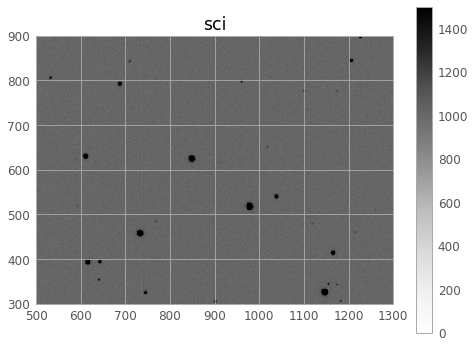

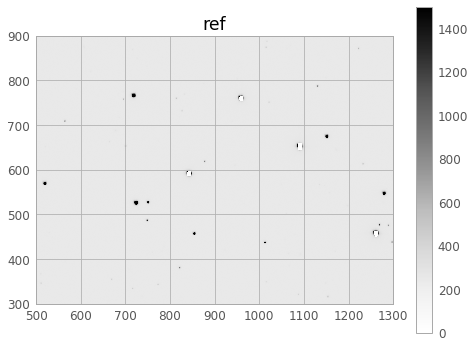

In [542]:
images = {"sci":sci_data, "ref":ref_data}
cats = {"sci":sci_cata, "ref":ref_cata}
it = "sci"

for it in ["sci", "ref"]:
    plt.figure()
    plt.imshow(images[it], interpolation='none', origin='lower', cmap='Greys', clim=(0,1500))
    plt.colorbar()
    #plt.scatter(cats[it]["X_IMAGE"], cats[it]["Y_IMAGE"], color='r', marker='+')
    #for i in range(len(cats[it]["X_IMAGE"])):
    #    plt.annotate('{0:.3f}, {1:.3f}'.format(cats[it]["ALPHA_SKY"].values[i], cats[it]["DELTA_SKY"].values[i]), 
    #    (cats[it]["X_IMAGE"].values[i]+10, cats[it]["Y_IMAGE"].values[i]+10), color='r', fontsize=8)
    plt.xlim(500,1300)
    plt.ylim(300,900)
    plt.title(it)

(1100.0, 1600.0)

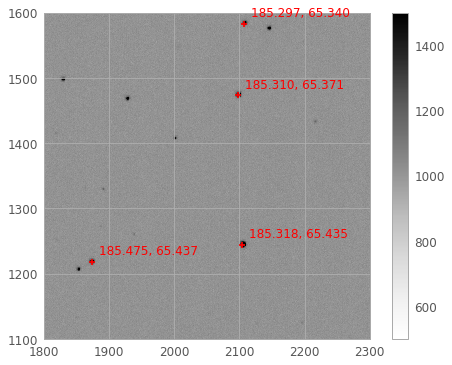

In [535]:
plt.figure()
plt.imshow(sci_data, interpolation='none', origin='lower', cmap='Greys', clim=(500,1500))
plt.colorbar()
plt.scatter(sci_cata["X_IMAGE"]-1, sci_cata["Y_IMAGE"]-1, color='r', marker='+')
for i in range(len(sci_cata["X_IMAGE"])):
    plt.annotate('{0:.3f}, {1:.3f}'.format(sci_cata["ALPHA_SKY"].values[i], sci_cata["DELTA_SKY"].values[i]), 
    (sci_cata["X_IMAGE"].values[i]+10, sci_cata["Y_IMAGE"].values[i]+10), color='r')
plt.xlim(1800,2300)
plt.ylim(1100,1600);

In [494]:
ind, d2d, d3d = xmatch(sci_cata,ref_cata)

In [503]:
print(ind, d2d, d3d)

[  3  20  30  21  36  34  30  43  53  58  46  49  63  72  63  58  85  66
  87 109 101  96  97  88  89  89 111 103 106 124 118 108 133 118 130 140
 126 147 132 138 159 171 163 166 172 183 195 185 190 204 185 205 182 185
 182 211 206 212 204 215 205 207 215 214 219 218 248 248 235 226 269 253
 242 252 250 260 262 258 236 256 270 265 271 292 293 296 310 319 311 316
 399 399 303 382 405 406 408 342 429 334 344 325 324 425 331 326 408 332
 348 352 372 335 423 408 382 401 325 387 408 421 334 393 401 334 421 326
 334 422] [0d01m33.9435962s 0d00m36.22229658s 0d01m17.06113092s 0d01m05.47550511s
 0d02m50.29779319s 0d01m35.62774898s 0d01m17.71924896s 0d02m39.56260712s
 0d01m29.46249759s 0d01m16.50344332s 0d01m29.15338687s 0d01m10.42583091s
 0d00m20.23923684s 0d01m23.13779839s 0d00m14.4623538s 0d01m46.89242342s
 0d01m27.65126013s 0d01m24.03856678s 0d01m19.64136501s 0d01m31.85326939s
 0d01m16.42117934s 0d00m48.29683099s 0d00m15.55841086s 0d00m44.48525724s
 0d00m19.86077413s 0d01m28.90466807s 0d01m2

In [511]:
ref_cata[ref_cata.index.isin(ind)]

,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,XMODEL_IMAGE,YMODEL_IMAGE,FLUX_AUTO,FLUX_MODEL,MAG_AUTO,MAG_MODEL,FLUX_RADIUS,FLAGS,NITER_MODEL,ALPHA_SKY,DELTA_SKY,THETA_WORLD,ELLIPTICITY
NUMBER,,,,,,,,,,,,,,,,,
3,2962.4260,70.0797,2962.4950,69.8864,2962.5027,69.9709,12919.670,13315.460,-10.2781,-10.3109,1.577,0,84,186.662531,65.750165,-27.57,0.036
20,1626.5532,199.5191,1626.5543,199.3293,1626.5543,199.4863,16767.840,16228.490,-10.5612,-10.5257,1.582,0,56,185.754838,65.750698,-82.35,0.066
21,540.2100,217.0310,540.1945,216.9210,540.2024,216.9926,3960.095,4441.086,-8.9943,-9.1187,1.526,0,59,185.021470,65.771460,-73.23,0.079
30,1395.3059,272.4351,1395.2802,272.2763,1395.2785,272.4008,11940.760,12492.630,-10.1926,-10.2416,1.574,0,47,185.594702,65.736269,-73.57,0.052
34,2817.5312,290.8136,2817.5242,290.6511,2817.5183,290.7423,11929.650,11936.770,-10.1916,-10.1922,1.572,0,49,186.549657,65.693379,-72.05,0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2199.1704,2971.6802,2199.1188,2971.6116,2199.0892,2971.6107,4060.235,4302.595,-9.0214,-9.0843,1.495,0,81,185.964198,64.969269,-61.12,0.037
422,1661.5481,3102.8572,1661.5581,3102.6853,1661.5634,3102.8066,15422.610,15966.800,-10.4704,-10.5080,1.508,0,49,185.605018,64.946594,84.14,0.031
423,3091.9011,3135.4709,3091.8430,3135.4105,3091.8155,3135.4234,3347.299,3641.850,-8.8117,-8.9033,1.495,0,49,186.536085,64.899580,-87.75,0.093


In [512]:
seps = d2d.to(u.arcsec).value
seps

array([ 93.9435962 ,  36.22229658,  77.06113092,  65.47550511,
       170.29779319,  95.62774898,  77.71924896, 159.56260712,
        89.46249759,  76.50344332,  89.15338687,  70.42583091,
        20.23923684,  83.13779839,  14.4623538 , 106.89242342,
        87.65126013,  84.03856678,  79.64136501,  91.85326939,
        76.42117934,  48.29683099,  15.55841086,  44.48525724,
        19.86077413,  88.90466807,  88.5953614 ,  47.58785118,
        34.87729186,  55.99645264,  68.60218727,  97.77245212,
       127.46085915,  77.99192535,  57.90910666,  36.03792213,
        57.7654787 ,  54.3612274 ,  42.32398044,  67.56059683,
        21.84067667,  63.8082273 , 118.34314958,  27.55363941,
        96.56557898, 102.96105363,  69.05109172,  55.16782662,
        41.35514084, 122.9982006 ,  41.11241092, 100.3572466 ,
       135.39311841, 124.4972784 , 136.32410537,  90.33357591,
        17.95737881,  50.77396339,  17.79466214,  48.70002068,
        50.51363444, 129.96430891,  43.69830106,  43.49

In [513]:
d3d/d2d

<Quantity [0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
           0.01745329, 0.01745329, 0.01745329, 0.01745329, 0.01745329,
      

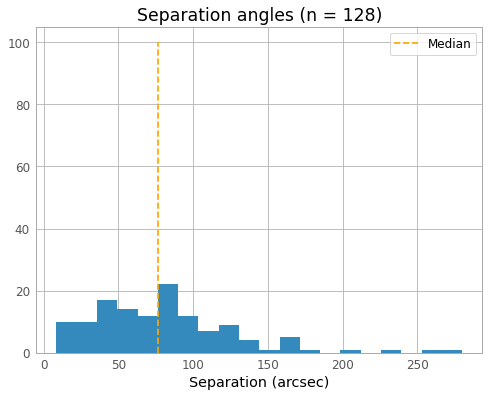

In [516]:
plt.hist(seps, bins=20)
plt.vlines(np.median(seps), 0, 100, color='orange', ls='--', label='Median')
plt.xlabel('Separation (arcsec)')
plt.title('Separation angles (n = {})'.format(len(seps)))
plt.legend()

In [517]:
print(ref_data.shape[0], ref_data.shape[1])

3200 3200


In [518]:
w = WCS(ref_header)
ramin, decmin = w.wcs_pix2world(0, 0, 1)
ramax, decmax = w.wcs_pix2world(3200,3200,1)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [519]:
print(ramin,ramax)
print(decmin,decmax)

184.667613604549 186.6020839510833
65.84300515066535 64.87864678467584


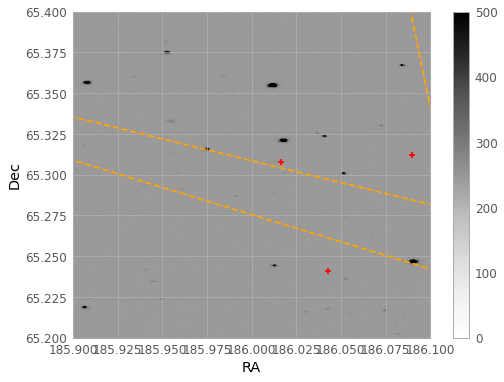

In [523]:
plt.figure()
plt.imshow(ref_data, interpolation='none', extent=[ramin,ramax,decmin,decmax], origin='lower', cmap='Greys', clim=(0,500), aspect='auto')
plt.colorbar()
plt.scatter(ref_cata["ALPHA_SKY"][ref_cata.index.isin(ind)], ref_cata["DELTA_SKY"][ref_cata.index.isin(ind)], color='r', marker='+')
plt.scatter(sci_cata["ALPHA_SKY"][sci_cata.index.isin(ind)], sci_cata["DELTA_SKY"][sci_cata.index.isin(ind)], color='b', marker='+')

for x1, y1, x2, y2 in zip(ref_cata["ALPHA_SKY"][ref_cata.index.isin(ind)], ref_cata["DELTA_SKY"][ref_cata.index.isin(ind)],
                          sci_cata["ALPHA_SKY"][sci_cata.index.isin(ind)], sci_cata["DELTA_SKY"][sci_cata.index.isin(ind)]):
    plt.plot([x1,x2],[y1,y2], color='orange', ls='--')

plt.xlim(185.9,186.1)
plt.ylim(65.2,65.4)
plt.xlabel('RA')
plt.ylabel('Dec');